In [2]:
# Load libraries required 
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler

# 1 Mulit-layer Perceptron Network


## 1.1 Credit Card Dataset
The data, **“CreditCard Data.csv”**, is a subset dataset from Yeh and hui Lien (2009).
The data contains 10,365 observations and 13 explanatory variables. The response vari-
able, Y, is a binary variable. 1 refers to *default payment* and “0” implies *non-default
payment*. The description of 13 explanatory variables is as follows:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit
- X2-X7: Amount of bill statement (NT dollar). X2 = amount of bill statement in September, 2005; X3 = amount of bill statement in August, 2005; . . .; X7 = amount of bill statement in April, 2005.
- X8-X13: Amount of previous payment (NT dollar). X8 = amount paid in September, 2005; X9 = amount paid in August 2005; . . .;X13 = amount paid in April, 2005.

## 1.2 Tasks
*The goal is to propose a MLP to classify the default payment.*
1. Select 70% of the full dataset as the training data, and retain the remaining as the
test dataset.

In [86]:
# Load data
data = pd.read_csv("CreditCard_Data.csv", index_col=0)

split = 0.7
train_size = int(len(data) * split)
X = data.loc[:, data.columns != "Y"]
y = data["Y"]

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
print('Train size: {}, Test size: {}'.format(len(X_train), len(X_test)))

Train size: 7255, Test size: 3110


2. Implement any data wrangling before training a MLP using training data

In [87]:
# Normalize the parameters
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

3. Propose a neural network model for the default credit classification

In [88]:
tf.random.set_seed(6)

model = keras.models.Sequential([
    keras.layers.Input(13),
    keras.layers.Dense(8, activation="relu"), # dense hidden layer with 64 neurons and Relu AF
    keras.layers.Dense(4, activation= "relu"), # dense hidden layer with 32 neurons and Relu AF
    keras.layers.Dense(1, activation="sigmoid") # as this is binary classification
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])

3. Propose a neural network model for the default credit classification
    1. Describe the structure of the proposed MLP model. Justify your choice.
    
        The proposed model is a fully connected Multi-Layer Perceptron which conists of an input layer with 13 neurons (1 for each input variable), two hidden layers with 8 and 4 neurons respecitvely that both use the "relu" activation function. Finally, there is the models output layer which consists of a single neuron and the "sigmoid" activation function. With this model, our output will be a scalar value between 0 and 1 representing the probablity of the output being 1

    2.  Describe an optimiser and any regularisation techniques implemented in the proposed network.

        The proposed model doesn't employ any regularisation techniques, but does employ the use of the "Adam" optimizer. The "Adam" optimizer is a stochastic gradient descent method that takes into account the momentum of the gradient. This optimizer was chosen as it good convergence speed and convergence quality.

        

In [89]:
early_stopping = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train, y_train, validation_split=0.1,epochs=100, callbacks=early_stopping)

Epoch 1/100
205/205 [==============================] - 2s 4ms/step - loss: 0.7120 - accuracy: 0.5327 - precision_1: 0.3021 - recall_1: 0.1373 - val_loss: 0.6809 - val_accuracy: 0.5813 - val_precision_1: 0.3056 - val_recall_1: 0.0379
Epoch 2/100
205/205 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.5990 - precision_1: 0.2778 - recall_1: 0.0077 - val_loss: 0.6621 - val_accuracy: 0.5978 - val_precision_1: 0.2500 - val_recall_1: 0.0034
Epoch 3/100
205/205 [==============================] - 0s 2ms/step - loss: 0.6548 - accuracy: 0.6091 - precision_1: 0.6417 - recall_1: 0.0298 - val_loss: 0.6484 - val_accuracy: 0.6006 - val_precision_1: 0.5000 - val_recall_1: 0.0241
Epoch 4/100
205/205 [==============================] - 0s 2ms/step - loss: 0.6418 - accuracy: 0.6387 - precision_1: 0.6148 - recall_1: 0.2351 - val_loss: 0.6423 - val_accuracy: 0.6625 - val_precision_1: 0.6415 - val_recall_1: 0.3517
Epoch 5/100
205/205 [==============================] - 0s 2ms/step -

4. Report the performance of the proposed MLP on the training dataset. Comment on the results

Train loss    : 0.5939726233482361
Train accuracy: 0.6793935298919678
Train precision: 0.6228775978088379
Train recall: 0.4847009778022766


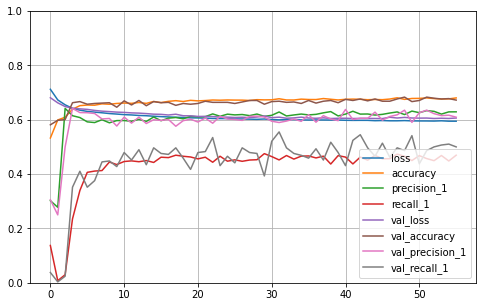

In [90]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss    :', score[0])
print('Train accuracy:', score[1])
print('Train precision:', score[2])
print('Train recall:', score[3])

The model, when tested on the training data set, achieved an accuracy of 67.9% whilst also maintaining a relatively high precision. Unfortunately, the model has a disproportionately low recall, indicating that the model is likely to predict that a customer won't default when indeed they will.

5. Report the performance of the proposed MLP on the test dataset. Comment on the results

Test loss    : 4865.83642578125
Test accuracy: 0.6192926168441772
Test precision: 0.5808538198471069
Test recall: 0.34300991892814636


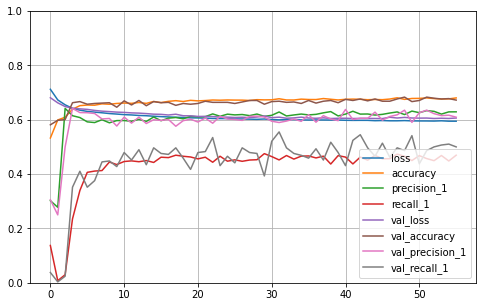

In [91]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss    :', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])

The model, when tested on the testing data set, achieved an accuracy of 61.9% whilst also maintaining a relatively high precision. The test accuracy is very close to, but still less than the testing accuracy, indicating that the model may have been slightly overfit. Unfortunately, the model still has a disproportionately low recall, indicating that the model is likely to predict that a customer won't default when indeed they will.

6. Discuss the limitation of your approach and any suggestions to improve the model
performance?

The proposed MLP model was susceptible to overfitting. There are multiple ways to address this issue, but an easy way is to introduce drop out layers. Drop out layers randomly set weights of random neurons to 0 between epochs, causing the MLP to lose the information from that neuron. As such, the developed model is much more robust and tends to not over fit as much. 

# 2 Time Series Modelling
## 2.1 Background

The data, **OilPrice.csv**, contains daily Brent oil price from January/2020 to August/2022. The data was collected from Federal Reserve Bank of St. Louis. Our aims are to:
1. **implement both ARMA/ARIMA and LSTM models to predict oil price**
2. **evaluate the performance of the models in predicting oil price**
The returns of Brent oil price, denoted as yt, is computed as follows $y_t = ln(Price_t) - ln(Price_{t-1})$ where $Price_t$ is a daily oil price of period $t$

## 2.2 Tasks
1. Plot oil price and its returns. Comment on the dynamic movement of the Brent oil price and its returns. 

In [ ]:
from numpy import array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm_notebook

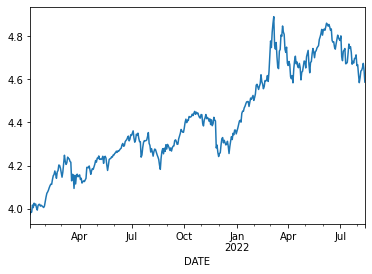

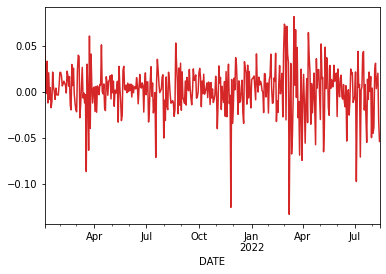

In [23]:
data = pd.read_csv("OilPrice.csv", 
                    parse_dates=["DATE"],
                    index_col="DATE",
                    dayfirst=True)

# The data contains missing values which are indicated by a value of "."
# we can fix this my using the mean of the surrounding values
# in some cases there are two missing days in a row so we will use a shift
# of two
data.replace(to_replace=".", value=np.nan, inplace=True)
data = data.astype('float')
data.fillna((data.shift(2) + data.shift(-2)) / 2, inplace=True) 

data["price_ln"] = np.log(data['DCOILBRENTEU'])
data["price_ln_diff"] = data["price_ln"].diff(1)
data.dropna(inplace=True)

plt.figure()
data.loc[:,'price_ln'].plot(label='log(Y)', color='tab:blue')
plt.show()
data.loc[:,'price_ln_diff'].plot(label='First difference log(Y) ', color='tab:red')
plt.show()

The brent oil price displays a distinct upward trent whilst also displaying the rises and falls that are indicative of a traditional security. There is no immediate evidence of any seasonality or cyclical component, but further testing is required. The oil price returns visually appears stationary (centred on 0 with a consistent variance), but again further testing will be required.

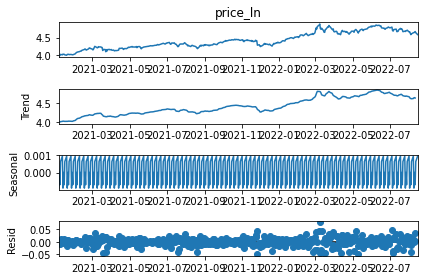

DATE
2021-01-05         NaN
2021-01-06         NaN
2021-01-07    3.992595
2021-01-08    4.002933
2021-01-11    4.009227
                ...   
2022-08-09    4.643829
2022-08-10    4.650477
2022-08-11    4.640143
2022-08-12         NaN
2022-08-15         NaN
Name: trend, Length: 420, dtype: float64
DATE
2021-01-05   -0.000889
2021-01-06    0.000009
2021-01-07   -0.000697
2021-01-08    0.000634
2021-01-11    0.000942
                ...   
2022-08-09   -0.000889
2022-08-10    0.000009
2022-08-11   -0.000697
2022-08-12    0.000634
2022-08-15    0.000942
Name: seasonal, Length: 420, dtype: float64
DATE
2021-01-05         NaN
2021-01-06         NaN
2021-01-07   -0.008486
2021-01-08    0.012996
2021-01-11   -0.005749
                ...   
2022-08-09   -0.000378
2022-08-10    0.004046
2022-08-11    0.035157
2022-08-12         NaN
2022-08-15         NaN
Name: resid, Length: 420, dtype: float64
DATE
2021-01-05    3.973306
2021-01-06    3.985273
2021-01-07    3.983413
2021-01-08    4.016563
202

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data.loc[:,'price_ln'], model='additive')
result.plot()
plt.show()

2. Proposing an approach to handle with missing values.

The data contains missing values which are indicated by a value of "." we can fix this my using the mean of the surrounding values in some cases there are two missing days in a row so we will use a shift of two

3. Use the data up to 29th July 2022 as the training dataset. Propose an ARMA(p,q)/ARIMA (p,d,q) model to fit the training dataset. Justify your choice.

In [14]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(data.loc[:, "DCOILBRENTEU"])
print("==============\nPrice\n==============")
print("ADF statistics =",ad_fuller_result[0])
print("p-value =",ad_fuller_result[1])

print("==============\nReturn\n==============")
ad_fuller_result = adfuller(data.loc[:, "price_ln_diff"])
print("ADF statistics =",ad_fuller_result[0])
print("p-value =",ad_fuller_result[1])

Price
ADF statistics = -1.7745515909324905
p-value = 0.39316729149024926
Return
ADF statistics = -20.582563628062978
p-value = 0.0


A p-value of less than 0.05 for the AD Fuller test on the return suggets that the first difference is indeed stationary

In [39]:
train = np.log(data.loc[:"2022-7-29", "DCOILBRENTEU"])
test = np.log(data.loc["2022-7-29":, "DCOILBRENTEU"])

p_values = range(0, 6)
q_values = range(0, 6)
min_mse = 1
min_order = ()
for p in p_values:
     for q in q_values:
            order = (p,1,q)
            warnings.filterwarnings("ignore")
            model = ARIMA(train, order=order).fit()
            predictions = model.predict(start=len(train), end=len(train) + len(test)-1)
            error = mean_squared_error(test, predictions)
            print('ARIMA%s MSE=%f' % (order,error))
            if (error < min_mse):
                min_mse = error
                min_order = order
print("Min_mse: " + str(min_mse))
print("min_order: " + str(min_order))


ARIMA(0, 0, 0) MSE=0.055487
ARIMA(0, 0, 1) MSE=0.049256
ARIMA(0, 0, 2) MSE=0.047674
ARIMA(0, 0, 3) MSE=0.042263
ARIMA(0, 0, 4) MSE=0.037927
ARIMA(0, 0, 5) MSE=0.036325
ARIMA(1, 0, 0) MSE=0.004275
ARIMA(1, 0, 1) MSE=0.004155
ARIMA(1, 0, 2) MSE=0.005230
ARIMA(1, 0, 3) MSE=0.004090
ARIMA(1, 0, 4) MSE=0.004163
ARIMA(1, 0, 5) MSE=0.004581
ARIMA(2, 0, 0) MSE=0.005270
ARIMA(2, 0, 1) MSE=0.005996
ARIMA(2, 0, 2) MSE=0.005094
ARIMA(2, 0, 3) MSE=0.005099
ARIMA(2, 0, 4) MSE=0.005069
ARIMA(2, 0, 5) MSE=0.004499


KeyboardInterrupt: 

After conducting a Dickey-Fuller test, we can conclude that the oil price return is indeed stationary, resulting in a d value of 1 for the ARIMA model. A grid search was then conducted to find the values of p and q which result in the lowest loss score with these values being X and Y.

4. Fit the proposed ARMA/ARIMA to the training data, and then evaluate the forecast performance of the proposed model on the test data. Comment on the performance of the model in predicting Brent oil price.

In [40]:
model = ARIMA(train, order=(5, 1, 2)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:           DCOILBRENTEU   No. Observations:                  409
Model:                 ARIMA(5, 1, 2)   Log Likelihood                 915.555
Date:                Thu, 08 Sep 2022   AIC                          -1815.110
Time:                        15:31:44   BIC                          -1783.020
Sample:                    01-05-2021   HQIC                         -1802.412
                         - 07-29-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0065      2.223     -0.003      0.998      -4.363       4.350
ar.L2         -0.0146      2.014     -0.007      0.994      -3.962       3.933
ar.L3         -0.0599      0.095     -0.632      0.5

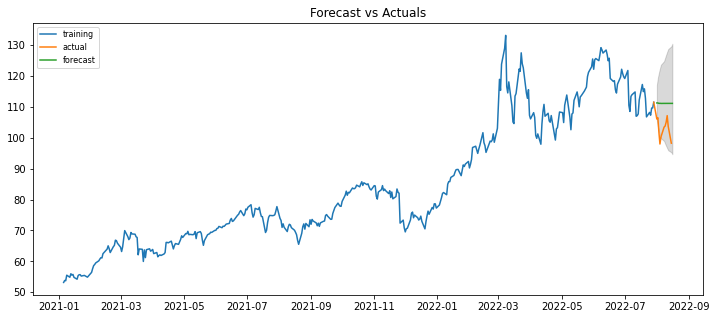

2022-08-01    4.712130
2022-08-02    4.712195
2022-08-03    4.710751
2022-08-04    4.711116
2022-08-05    4.710725
2022-08-08    4.710855
2022-08-09    4.710815
2022-08-10    4.710875
2022-08-11    4.710853
2022-08-12    4.710866
2022-08-15    4.710859
2022-08-16    4.710862
Freq: B, Name: predicted_mean, dtype: float64


In [41]:
predict = model.get_prediction(start=len(train), end=len(train) + len(test)-1)
predict_ci = predict.conf_int()

# Plot
plt.figure(figsize=(12,5))
plt.plot(np.exp(train), label='training')
plt.plot(np.exp(test), label='actual')
plt.plot(np.exp(predict.predicted_mean), label='forecast')
plt.fill_between(predict_ci.index,
                 np.exp(predict_ci.iloc[:,0]),
                 np.exp(predict_ci.iloc[:,1]), color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The model predicts a flat line and does not do a good job at predicting the brent oil price. The reason for the flat line can be attributed to the low magnitude coefficient values which means that the next days price is not impacted at all by neither the previous days nor the moving average.

5. Propose a LSTM model to fit the training dataset. Justify your choice.

In [64]:
from sklearn.preprocessing import RobustScaler

data = pd.read_csv("OilPrice.csv", 
                    parse_dates=["DATE"],
                    index_col="DATE",
                    dayfirst=True)

# The data contains missing values which are indicated by a value of "."
# we can fix this my using the mean of the surrounding values
# in some cases there are two missing days in a row so we will use a shift
# of two
data.replace(to_replace=".", value=np.nan, inplace=True)
data = data.astype('float')
data.fillna((data.shift(2) + data.shift(-2)) / 2, inplace=True) 

data["price_diff"] = data['DCOILBRENTEU'].diff(1)
data1 = data.dropna()


train = data1[:"2022-07-29"]
train_size = len(train)

# normalize the dataset
price_scaler = RobustScaler()
price_scaler = price_scaler.fit(train[['price_diff']])

data1['price_diff'] = price_scaler.transform(data1[['price_diff']])

def create_dataset(X,y,time_steps):
    Xs, ys = [],[]
    for i in range(len(X)-time_steps):
        v = X.iloc[i:(i+time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 2
X, y = create_dataset(data1[["price_diff"]], data1[['price_diff']], time_steps)
X_train, X_test = X[:train_size-time_steps-1,:,:], X[train_size-time_steps-1:,:,:]
y_train, y_test = y[:train_size-time_steps-1], y[train_size-time_steps-1:]

# Building a model
np.random.seed(6)
tf.random.set_seed(6)

model = keras.models.Sequential([
    keras.layers.LSTM(20, activation='tanh',recurrent_activation='sigmoid', return_sequences=True),
    keras.layers.LSTM(20, activation='tanh',recurrent_activation='sigmoid'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')


Epoch 1/100
12/12 [==============================] - 7s 100ms/step - loss: 1.2043 - val_loss: 2.2743
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 1.2017 - val_loss: 2.2671
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 1.2002 - val_loss: 2.2616
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 1.1990 - val_loss: 2.2572
Epoch 5/100
12/12 [==============================] - 0s 9ms/step - loss: 1.1980 - val_loss: 2.2535
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 1.1969 - val_loss: 2.2502
Epoch 7/100
12/12 [==============================] - 0s 16ms/step - loss: 1.1958 - val_loss: 2.2471
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 1.1947 - val_loss: 2.2441
Epoch 9/100
12/12 [==============================] - 0s 9ms/step - loss: 1.1934 - val_loss: 2.2412
Epoch 10/100
12/12 [==============================] - 0s 9ms/step - loss: 1.1921 - val_loss: 2.2382
Epoch

The proposed LSTM model contains 2 layers (1 for each day we wish to learn from) with each layer containing 20 units. The output layer is a single node whose values represents the predicted price.

6. Train the proposed LSTM model using the training dataset, and then evaluate the forecast performance of the proposed model on the test data. Comment on the performance of the model in predicting Brent oil price.

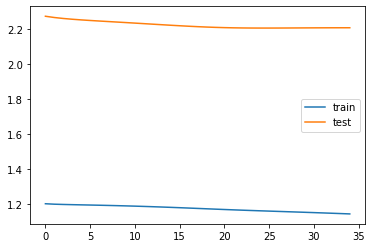

In [57]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    callbacks=keras.callbacks.EarlyStopping(patience=10),
                    shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [65]:
# making prediction
y_pred = model.predict(X_test)

# inverting predictions

y_train_inv = price_scaler.inverse_transform(y_train.reshape(1, -1)) #transforming y_train to column vector
y_test_inv = price_scaler.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = price_scaler.inverse_transform(y_pred.reshape(1,-1))

1/1 [==============================] - 1s 959ms/step


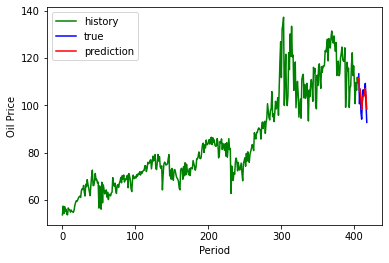

In [66]:
raw_Price = data1["DCOILBRENTEU"].values
y_train_inv = y_train_inv.flatten() + raw_Price[time_steps:train_size-1]
y_test_inv = y_test_inv.flatten() + raw_Price[train_size-1:,]
y_pred_inv = y_pred_inv.flatten() +raw_Price[train_size-1:,]


plt.plot(np.arange(0, len(y_train)), y_train_inv, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv, 'b', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv, 'r', label="prediction")
plt.ylabel('Oil Price')
plt.xlabel('Period')
plt.legend()
plt.show()

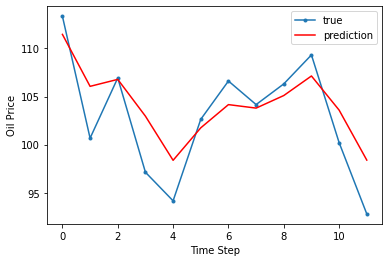

In [67]:
plt.plot(y_test_inv, marker='.', label="true")
plt.plot(y_pred_inv, 'r', label="prediction")
plt.ylabel('Oil Price')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [68]:
RMSE = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print('Score: %.2f RMSE' % (RMSE))

Score: 3.42 RMSE


The proposed LSTM model closely tracks the brent oil price over the prediction period and has a Root Mean Squared Error value of 3.42. In the worst case, the delta between the true value and predicted price is ~ 5%.

7. Design a backtesting strategy to evaluate the forecast performance of ARMA/ARIMA and LSTM models for 1 and 2-day-forecast-ahead of Brent oil price for the period of 1/8/2022-15/8/2022.

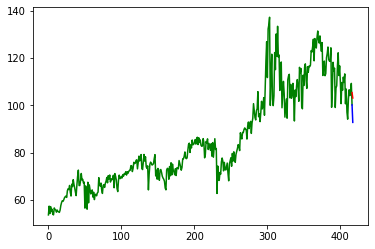

In [138]:
import time
from IPython.display import display, clear_output

min_train = 50
X = data1[["price_diff"]].values
time_steps = 2

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
first = True
for i in range(min_train, len(X)):
    train_size = i
    X, y = create_dataset(data1[["price_diff"]], data1.loc[:, "price_diff"], time_steps)
    X_train, X_test = X[:train_size-time_steps-1,:,:], X[train_size-time_steps-1:train_size-1,:,:]
    y_train, y_test = y[:train_size-time_steps-1], y[train_size-time_steps-1:train_size-1]
    # print('train=%d, test=%d' % (len(y_train), len(y_test)))
    history = model.fit(X_train, 
                        y_train, 
                        epochs=100, 
                        validation_split=0.1, 
                        callbacks=keras.callbacks.EarlyStopping(patience=10),
                        shuffle=False,
                        verbose=0)

    # making prediction
    y_pred = model.predict(X_test, verbose=0)

    # inverting predictions
    y_train = y[:train_size-time_steps]
    y_train_inv = price_scaler.inverse_transform(y_train.reshape(1, -1)) #transforming y_train to column vector
    y_test_inv = price_scaler.inverse_transform(y_test.reshape(1, -1))
    y_pred_inv = price_scaler.inverse_transform(y_pred.reshape(1,-1))

    raw_Price = data1["DCOILBRENTEU"].values
    y_train_inv = y_train_inv.flatten() + raw_Price[time_steps:train_size]
    y_test_inv = y_test_inv.flatten() + raw_Price[train_size-1:train_size+1]
    y_pred_inv = y_pred_inv.flatten() + raw_Price[train_size-1:train_size+1]

    ax.set_xlim(0, i)
    ax.cla()
    ax.plot(np.arange(0, len(y_train)), y_train_inv, 'g', label="history")
    ax.plot(np.arange(len(y_train) - 1, len(y_train) + len(y_test) - 1), y_test_inv, 'b', label="true")
    ax.plot(np.arange(len(y_train) - 1, len(y_train) + len(y_test) - 1), y_pred_inv, 'r', label="prediction")

    if(first):
        plt.legend()
        first = False
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.5) 

first = True
for i in range(min_train, len(X)):
    train_size = i
    train = np.log(data.iloc[:train_size])
    test = np.log(data.iloc[train_size:train_size+1])
    model = ARIMA(train, order=(5, 1, 2)).fit()

    predict = model.get_prediction(start=len(train), end=len(train) + 1)
    predict_ci = predict.conf_int()

    # Plot
    ax.set_xlim(0, i)
    ax.cla()
    ax.plot(np.exp(train), label='training')
    ax.plot(np.exp(test), label='actual')
    ax.plot(np.exp(predict.predicted_mean), label='forecast')
    ax.fill_between(predict_ci.index,
                    np.exp(predict_ci.iloc[:,0]),
                    np.exp(predict_ci.iloc[:,1]), color='k', alpha=.15)

    if(first):
        plt.legend()
        first = False
    display(fig)
    
    clear_output(wait = True)
    plt.pause(0.5) 

The back testing method proposed is a walk-forward sliding window that uses all the previous data points to predict the next days value, whether that be 1 or 2 days ahead.

8. Compare and discuss results obtained from ARMA/ARIMA and LSTM models in part (7). Is there any suggestion that you would like to propose to improve the performance of the models?

The LSTM model performs very well with the proposed back-testing strategy. Unforunately, the ARIMA model is still unable to produce a viable prediction. In conclusion, LSTM is very nice and ARIMA is not.